### Regresion lineal

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [61]:
#Definir los datos de prueba
np.random.seed(42)

#Generar 100 valores aleatorios entre 0 y 2
X = 2 * np.random.rand(500, 1)

#Hacemos el calculo con la funcion 4+3X+ruido_gaussiano
Y = 4 + 3 * X + np.random.randn(500, 1)

data = pd.DataFrame(np.hstack((X, Y)), columns=['X','Y'])


data.head()


,X,Y
0,0.749080,6.588997
1,1.901429,11.580457
2,1.463988,9.342387
3,1.197317,7.015047
4,0.312037,4.037697


<function matplotlib.pyplot.show(close=None, block=None)>

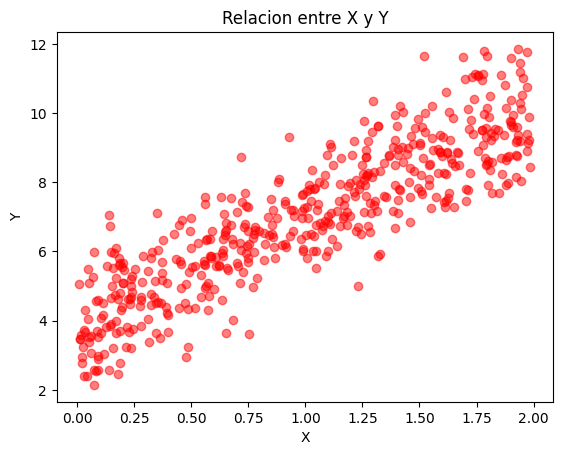

In [62]:
plt.scatter(data['X'], data['Y'], color = 'red' ,alpha = 0.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Relacion entre X y Y')
plt.show

In [63]:
#Dividir los datos en conjuntos. Entrenamiento; prueba
x_train, x_test, y_train, y_test = train_test_split(data[['X']], data['Y'], test_size = 0.1, random_state = 42)

In [64]:
modelo = LinearRegression()
modelo.fit(x_train, y_train)

LinearRegression()

[ 7.90777569  8.98938854  4.31377726  5.38718198  9.56800354  6.0075305
  4.0127587   5.29847775  4.33489772  8.74869216  8.31475884  5.99638759
  6.31157344  5.82019001  3.9810333   8.58201391  6.08636287  7.68323156
  6.43565327  9.55428026  6.72905222  7.76230929  9.45768239  4.03310884
  8.71177484  7.94497894  4.35489995  8.21313059  7.86456848  4.15555574
 10.10448609  9.24066806  4.39952234  5.28943535  8.46503573  4.59574391
  4.4400355   8.71789628  4.87677715  6.10772898  8.48436646  7.39257258
  9.5277448   8.01266089  9.82757487  4.33171902  6.21946775  9.95965215
  6.6837504   5.70184948]


<Axes: xlabel='y_test', ylabel='y_pred'>

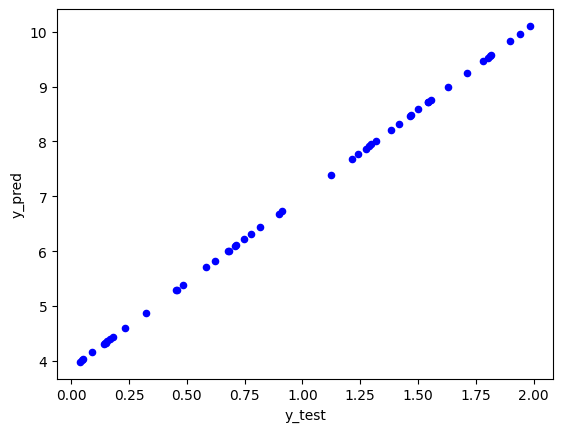

In [65]:
#Utilizamos los datos de prueba para probar el modelo entrenado

y_pred = modelo.predict(x_test)

#imprimimos los valores
print(y_pred)

# result = pd.DataFrame({'y_test': x_test.values.flatten(), 'y_pred': y_pred.values.flatten()})
result = pd.DataFrame({'y_test': x_test.values.flatten(), 'y_pred': y_pred.flatten()})


result.plot(kind="scatter", x='y_test', y='y_pred', color="blue")

In [54]:
#Evaluar el modelo

#Calcular el error cuadratico medio. Entre mas pequeño mas acertado es el modelo
mse = mean_squared_error(y_test, y_pred)

#Calcular coeficiente de determinacion r2
r2 = r2_score(y_test, y_pred)

print(f"error cuadratico medio: {mse:.2f}")
print(f"Coeficiente de determinacion: {r2:.2f}")

error cuadratico medio: 0.76
Coeficiente de determiacion: 0.75


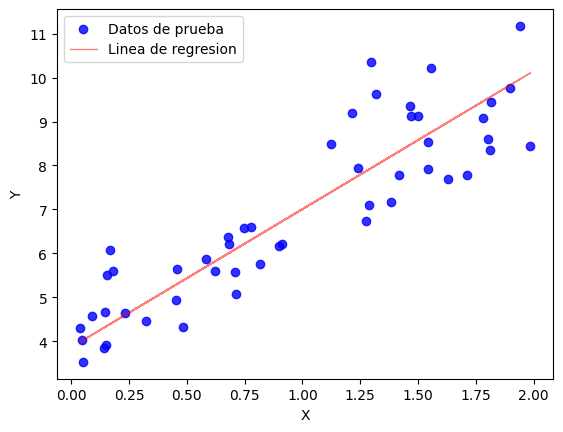

In [66]:
#Mostrar la linea de regresion


plt.scatter(x_test, y_test, alpha=0.8, color="blue", label="Datos de prueba")
plt.plot(x_test, y_pred, alpha=0.5, color="red", linewidth=1, label="Linea de regresion")

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [95]:
#Leer la data del csv
precios_casa = pd.read_csv('precios_casas.csv')
precios_casa.head()

,Tamaño_m2,Precio_1000s
0,132,381.740941
1,136,384.019853
2,101,304.335216
3,218,555.248622
4,50,170.606562


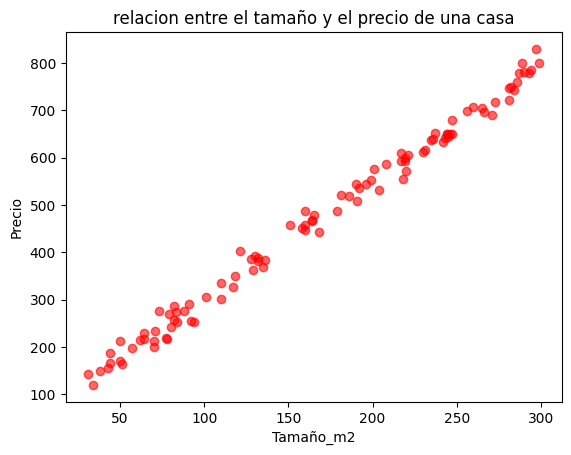

In [96]:
#Mostrar el representacion de la correlacion
plt.scatter(precios_casa['Tamaño_m2'], precios_casa['Precio_1000s'], color="red", alpha=0.6)
plt.xlabel('Tamaño_m2')
plt.ylabel('Precio')
plt.title("relacion entre el tamaño y el precio de una casa")
plt.show()

In [112]:
x_train, x_test, y_train, y_test = train_test_split(precios_casa[['Tamaño_m2']], precios_casa['Precio_1000s'], test_size=0.3, random_state=42)

modelo = LinearRegression()
modelo.fit(x_train, y_train)

LinearRegression()

[353.14609969 588.982802   262.250704   326.12314421 778.14349032
 252.42417474 257.33743937 161.52877905 195.92163148 544.76342032
 370.3425259  525.11036179 758.49043179 461.23792158 635.658816
 458.78128927 326.12314421 380.16905516 633.20218369 448.95476
 458.78128927 279.44713021 245.05427779 132.04919126 448.95476
 588.982802   593.89606663 375.25579053 549.67668495 272.07723326]


<Axes: xlabel='y_test', ylabel='y_pred'>

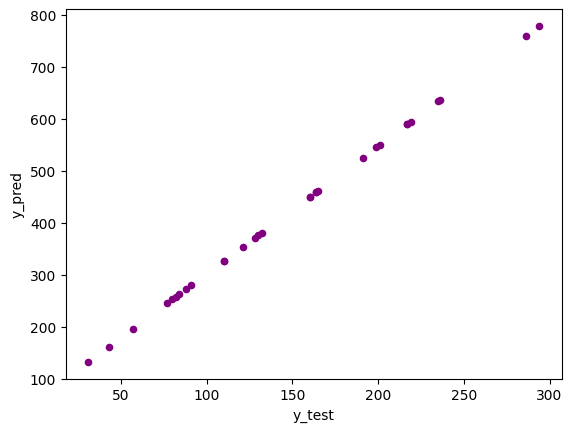

In [113]:
#Probar modelo

y_pred = modelo.predict(x_test)

print(y_pred)

result = pd.DataFrame({'y_test': x_test.values.flatten(), 'y_pred': y_pred.flatten() })

result.plot(kind="scatter", x="y_test", y="y_pred", color="purple")


In [116]:
#Evaluar modelo

mse = mean_squared_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)

print(f"Error cuadratico medio {mse:.2f}")
print(f"Coeficiente de determinacion {r2:.2f}")

Error cuadratico medio 225.82
Coeficiente de determinacion 0.99


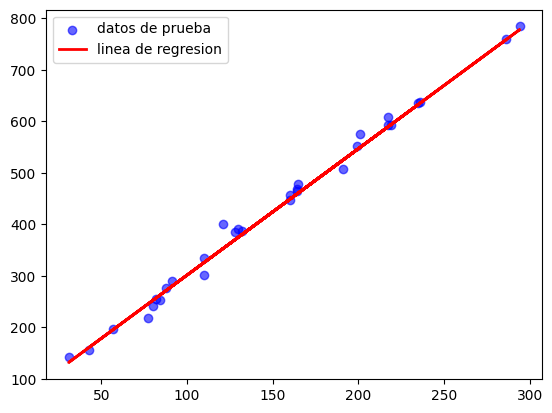

In [119]:
#Mostrar la linea de regresion

plt.scatter(x_test, y_test, color="blue", alpha=0.6, label="datos de prueba")
plt.plot(x_test, y_pred, color="red", linewidth=2, label="linea de regresion")
plt.legend()
plt.show()

In [124]:
modelo.predict([[180]])

c:\Users\dilan\OneDrive\Escritorio\Pruebas IA\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([498.08740632])

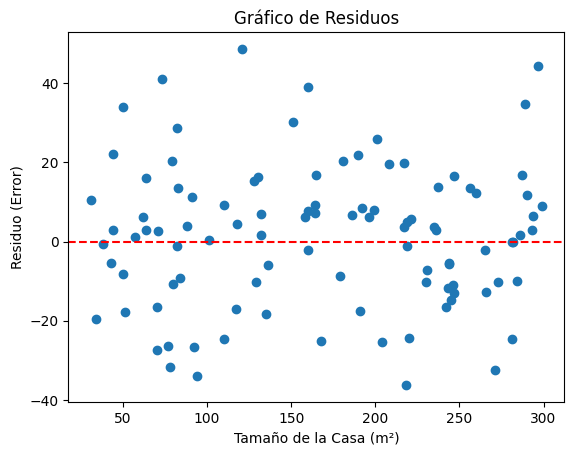

In [125]:
#Grafico de residuos para verificar la validez del modelo
import matplotlib.pyplot as plt

residuos = precios_casa["Precio_1000s"] - modelo.predict(precios_casa[["Tamaño_m2"]])
plt.scatter(precios_casa["Tamaño_m2"], residuos)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Tamaño de la Casa (m²)")
plt.ylabel("Residuo (Error)")
plt.title("Gráfico de Residuos")
plt.show()


In [136]:
df = pd.read_csv('consumo_combustible.csv')
df.head()

,Velocidad,Consumo
0,67.454012,4.798177
1,125.071431,2.684514
2,103.199394,3.315242
3,89.865848,3.218256
4,45.601864,5.270699


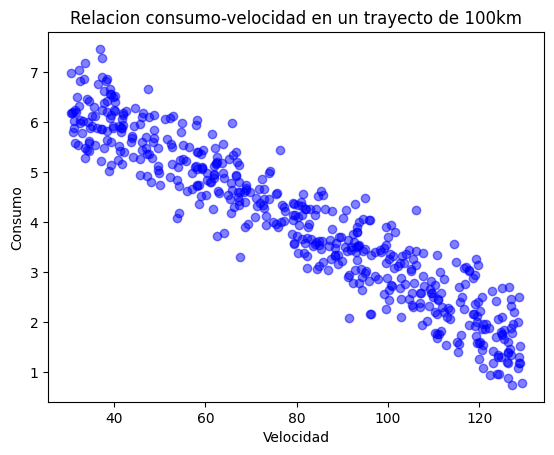

In [137]:
X = df['Velocidad']
Y = df['Consumo']
plt.scatter(X, Y, color="blue", alpha=0.5)
plt.xlabel("Velocidad")
plt.ylabel("Consumo")
plt.title("Relacion consumo-velocidad en un trayecto de 100km")
plt.show()

In [138]:
#Dividir los datos de entrenamiento de los de prueba
x_train, x_test, y_train, y_test = train_test_split(df[['Velocidad']], df['Consumo'], test_size=0.2, random_state=42)

In [139]:
#Entrenar al modelo
modelo = LinearRegression()
modelo.fit(x_train, y_train)

LinearRegression()

<Axes: xlabel='y_test', ylabel='y_pred'>

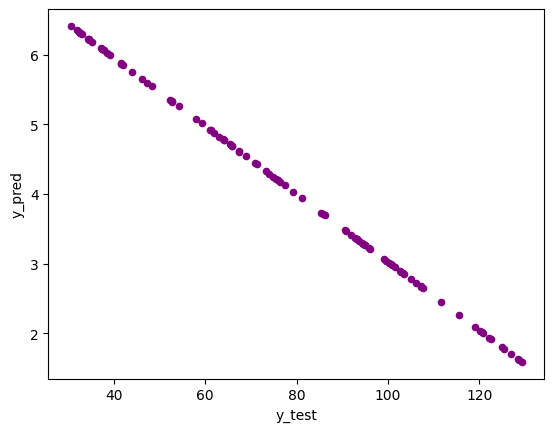

In [141]:
y_pred = modelo.predict(x_test)

result = pd.DataFrame({'y_test': x_test.values.flatten(), 'y_pred': y_pred.flatten()})

result.plot(kind="scatter", x="y_test", y="y_pred", color="purple")

In [145]:
#evaluar el modelo

mse = mean_squared_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)

print(f"Error cuadratico medio {mse:.2f}")
print(f"Coeficiente de determinacion {r2:.2f}")

Error cuadratico medio 0.26
Coeficiente de determinacion 0.89


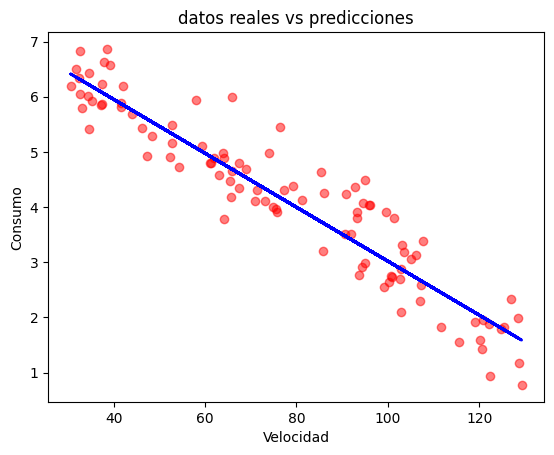

In [149]:
#Graficar la linea de regresion

plt.scatter(x_test, y_test, color="red", alpha=0.5)
plt.plot(x_test, y_pred, color="blue", linewidth=2 )
plt.title("datos reales vs predicciones")
plt.xlabel("Velocidad")
plt.ylabel("Consumo")
plt.show()

In [151]:
modelo.predict([[120]])

c:\Users\dilan\OneDrive\Escritorio\Pruebas IA\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.04337096])